<a href="https://colab.research.google.com/github/kxma-blazi/forCSD2301/blob/main/Project_Real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Import the requests library
import requests

# Fetch the data.
# Fetch the data.
co2 = pd.read_csv("https://ourworldindata.org/grapher/annual-co2-emissions-per-country.csv?v=1&csvType=filtered&useColumnShortNames=true&country=~THA", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
tem = pd.read_csv("https://ourworldindata.org/grapher/country-level-monthly-temperature-anomalies.csv?v=1&csvType=filtered&useColumnShortNames=true&country=~THA", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
temmie = pd.read_csv("Annual Tem.csv")


#ข้อมูล Co2 กับ Tem

In [ ]:
co2

,Entity,Code,Year,emissions_total
0,Thailand,THA,1931,29074.0
1,Thailand,THA,1932,25440.0
2,Thailand,THA,1933,21806.0
3,Thailand,THA,1934,25440.0
4,Thailand,THA,1935,25440.0
...,...,...,...,...
85,Thailand,THA,2019,281877440.0
86,Thailand,THA,2020,271923300.0
87,Thailand,THA,2021,267141810.0
88,Thailand,THA,2022,272573380.0


In [ ]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           90 non-null     object 
 1   Code             90 non-null     object 
 2   Year             90 non-null     int64  
 3   emissions_total  90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [ ]:
tem

,Entity,Code,Year,january,february,march,april,may,june,july,august,september,october,november,december
0,Thailand,THA,1940,-2.140673,-0.256042,-1.076235,-2.014555,-1.983593,-2.159905,-2.265928,-2.085291,-2.475843,-2.191935,-2.386728,-0.953011
1,Thailand,THA,1941,0.449530,0.342232,-0.430355,-1.747904,-1.933788,-2.634817,-2.072622,-2.125750,-2.577528,-2.455358,-1.350916,-0.338575
2,Thailand,THA,1942,-0.660986,0.237957,-1.060888,-1.617109,-2.202963,-2.427847,-1.850229,-1.447142,-2.218191,-2.614307,-3.061045,-2.108254
3,Thailand,THA,1943,-2.148464,-1.765118,-1.002256,-2.082045,-2.632139,-1.999247,-1.658052,-1.881863,-1.961721,-1.639563,-1.786099,-1.026083
4,Thailand,THA,1944,-0.469870,-0.892487,-0.820059,-1.007759,-0.674789,-1.722279,-1.760006,-1.457197,-1.377087,-1.282402,-0.943199,-2.218636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Thailand,THA,2021,-0.988207,-0.229948,0.676115,-1.045242,0.547413,0.370359,0.309250,0.681944,-0.027231,0.283947,0.692406,-0.151066
82,Thailand,THA,2022,0.747221,-0.505686,0.328108,-0.978563,-0.972418,0.254284,0.375998,0.190371,-0.085646,-0.288027,0.878443,0.040615
83,Thailand,THA,2023,-0.690865,0.160196,-0.036137,1.394337,1.303612,0.588688,0.886286,0.792994,0.344223,0.805256,0.797560,1.687872
84,Thailand,THA,2024,1.286522,1.554394,1.125155,2.691326,1.205324,0.729839,0.197430,0.728149,0.476849,0.830103,0.724131,0.637136


#Co2

In [ ]:
co2.dropna(inplace=True)  # ลบแถวที่มีค่า NaN
co2.dropna(axis=1, inplace=True)  # ลบคอลัมน์ที่มีค่า NaN
co2['emissions_total'] = co2['emissions_total'].astype(int)

In [ ]:
co2.drop('Code', axis=1, inplace=True)

In [ ]:
co2 #ข้อมูลที่ถูก Clean

,Entity,Year,emissions_total
0,Thailand,1931,29074
1,Thailand,1932,25440
2,Thailand,1933,21806
3,Thailand,1934,25440
4,Thailand,1935,25440
...,...,...,...
85,Thailand,2019,281877440
86,Thailand,2020,271923300
87,Thailand,2021,267141810
88,Thailand,2022,272573380


In [ ]:
filtered_co2 = co2[(co2['Year'] >= 2010) & (co2['Year'] <= 2023)]
filtered_co2 #ข้อมูลที่ถูก Sort ให้อยู่ในช่วง 2014 -2023

,Entity,Year,emissions_total
76,Thailand,2010,241018980
77,Thailand,2011,244878160
78,Thailand,2012,262347660
79,Thailand,2013,263753500
80,Thailand,2014,272487650
81,Thailand,2015,277098720
82,Thailand,2016,284045470
83,Thailand,2017,283347620
84,Thailand,2018,288304900
85,Thailand,2019,281877440


In [ ]:
average_co2 = filtered_co2.groupby('Year')['emissions_total'].mean().reset_index()
average_co2.columns=['Year','Average CO2 Emissions']
print(average_co2)

    Year  Average CO2 Emissions
0   2010            241018980.0
1   2011            244878160.0
2   2012            262347660.0
3   2013            263753500.0
4   2014            272487650.0
5   2015            277098720.0
6   2016            284045470.0
7   2017            283347620.0
8   2018            288304900.0
9   2019            281877440.0
10  2020            271923300.0
11  2021            267141810.0
12  2022            272573380.0
13  2023            264388640.0


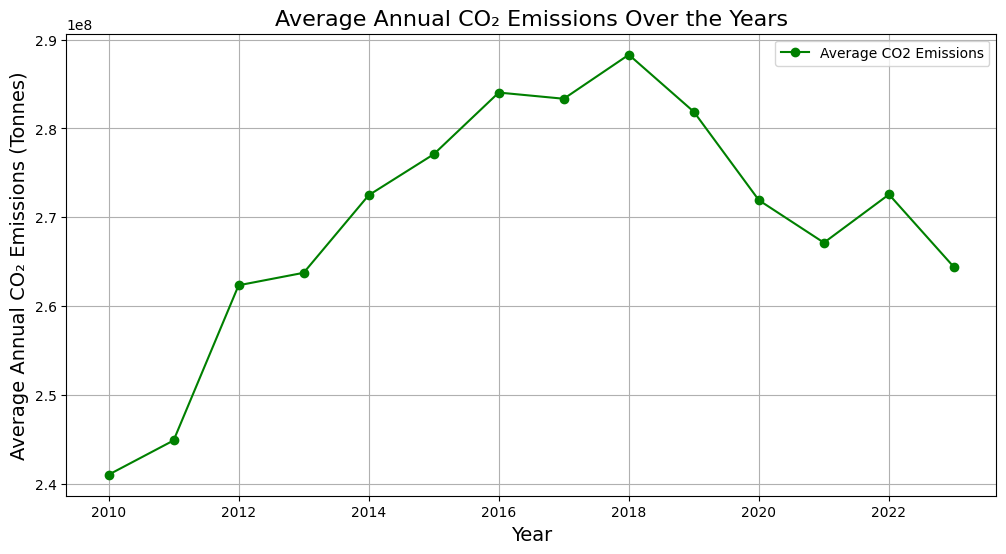

In [ ]:
import matplotlib.pyplot as plt

# คำนวณค่าเฉลี่ยการปล่อย CO2 ต่อปี
average_co2 = filtered_co2.groupby('Year')['emissions_total'].mean().reset_index()

# สร้างกราฟ
plt.figure(figsize=(12, 6))
plt.plot(average_co2['Year'], average_co2['emissions_total'], marker='o', color='green', label='Average CO2 Emissions')

# ตั้งชื่อกราฟและแกน
plt.title('Average Annual CO₂ Emissions Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Annual CO₂ Emissions (Tonnes)', fontsize=14)

# เพิ่มตารางกริด
plt.grid(True)

# แสดงคำอธิบาย
plt.legend()

# แสดงกราฟ
plt.show()

#Tem

In [ ]:
# ลบคอลัมน์ 'Code'
tem.dropna(inplace=True)  # ลบแถวที่มีค่า NaN
tem.dropna(axis=1, inplace=True)  # ลบคอลัมน์ที่มีค่า NaN
tem.drop('Code', axis=1, inplace=True)

In [ ]:
tem #ข้อมูลที่ถูก Cleaning

,Entity,Year,january,february,march,april,may,june,july,august,september,october,november,december
0,Thailand,1940,-2.140673,-0.256042,-1.076235,-2.014555,-1.983593,-2.159905,-2.265928,-2.085291,-2.475843,-2.191935,-2.386728,-0.953011
1,Thailand,1941,0.449530,0.342232,-0.430355,-1.747904,-1.933788,-2.634817,-2.072622,-2.125750,-2.577528,-2.455358,-1.350916,-0.338575
2,Thailand,1942,-0.660986,0.237957,-1.060888,-1.617109,-2.202963,-2.427847,-1.850229,-1.447142,-2.218191,-2.614307,-3.061045,-2.108254
3,Thailand,1943,-2.148464,-1.765118,-1.002256,-2.082045,-2.632139,-1.999247,-1.658052,-1.881863,-1.961721,-1.639563,-1.786099,-1.026083
4,Thailand,1944,-0.469870,-0.892487,-0.820059,-1.007759,-0.674789,-1.722279,-1.760006,-1.457197,-1.377087,-1.282402,-0.943199,-2.218636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Thailand,2020,1.522823,0.505913,1.123976,0.345552,1.518372,0.527296,0.909803,0.365042,0.690800,-0.596054,0.526932,0.162399
81,Thailand,2021,-0.988207,-0.229948,0.676115,-1.045242,0.547413,0.370359,0.309250,0.681944,-0.027231,0.283947,0.692406,-0.151066
82,Thailand,2022,0.747221,-0.505686,0.328108,-0.978563,-0.972418,0.254284,0.375998,0.190371,-0.085646,-0.288027,0.878443,0.040615
83,Thailand,2023,-0.690865,0.160196,-0.036137,1.394337,1.303612,0.588688,0.886286,0.792994,0.344223,0.805256,0.797560,1.687872


In [ ]:
filtered_tem = tem[(tem['Year'] >= 2010) & (tem['Year'] <= 2023)]
filtered_tem #ข้อมูลที่ถูก Sort ให้อยู่ในช่วง 2014 -2023

,Entity,Year,january,february,march,april,may,june,july,august,september,october,november,december
70,Thailand,2010,0.984222,1.174337,0.369297,1.210800,1.492868,0.909563,0.461355,-0.115629,0.260405,-0.234682,-0.339226,0.498739
71,Thailand,2011,-0.997461,-0.127138,-2.649731,-1.379482,-0.718489,-0.349144,-0.176125,-0.221737,-0.209435,-0.211319,0.121090,-0.650597
72,Thailand,2012,0.541401,0.525688,-0.244717,-0.368954,-0.316935,-0.226360,-0.283363,-0.086697,0.007111,0.521187,1.521742,1.724270
73,Thailand,2013,0.267368,1.173666,0.308378,0.419672,0.442644,-0.102297,-0.320383,-0.076357,-0.203711,-0.272156,0.520908,-2.270214
74,Thailand,2014,-2.061873,-0.337481,0.346821,-0.067268,0.590925,0.335735,0.152823,0.032911,0.245308,0.186911,0.786449,0.189402
75,Thailand,2015,-1.102100,-0.462267,0.391073,-0.207209,1.038315,0.866934,0.390671,0.472334,0.519638,0.304636,1.463255,1.527170
76,Thailand,2016,0.239864,-1.106806,0.817884,2.151733,1.435331,0.221203,0.016626,0.508694,0.248030,0.688984,0.926620,0.793875
77,Thailand,2017,0.898201,-0.373566,0.042660,-0.425699,-0.231628,0.083540,-0.322554,0.437397,0.701883,0.325466,0.475979,-0.058638
78,Thailand,2018,0.561340,-0.702528,-0.556105,-1.133835,-0.497067,-0.175308,-0.122942,-0.117962,0.424499,0.666245,0.845533,1.758219
79,Thailand,2019,0.972895,1.437410,0.825233,1.315382,0.930704,0.793941,0.700394,0.129511,0.212284,0.894476,0.531111,-0.003899


In [ ]:
temmie

,Category,Annual Mean
0,1901,26.59
1,1902,26.54
2,1903,26.30
3,1904,26.16
4,1905,26.94
...,...,...
118,2019,27.48
119,2020,27.41
120,2021,26.88
121,2022,26.73


In [ ]:
temmie = temmie.rename(columns={'Category': 'Year'})

In [ ]:
filtered_temmie = temmie[(temmie['Year'] >= 2010) & (temmie['Year'] <= 2023)]
filtered_temmie #ข้อมูลที่ถูก Sort ให้อยู่ในช่วง 2014 -2023

,Year,Annual Mean
109,2010,27.30
110,2011,26.26
111,2012,27.14
112,2013,26.79
113,2014,26.89
114,2015,27.31
115,2016,27.44
116,2017,26.90
117,2018,26.91
118,2019,27.48


In [ ]:
merged_df = filtered_tem.merge(filtered_temmie, on="Year")

In [ ]:
# Merge the DataFrames to include 'Annual Mean'
merged_df = filtered_tem.merge(filtered_temmie[['Year', 'Annual Mean']], on='Year', how='left')


for month in filtered_tem.columns[2:]:  # ข้ามคอลัมน์ "Year"
    merged_df[month] = merged_df["Annual Mean"] + merged_df[month]

In [ ]:
merged_df.drop(columns=["Annual Mean"], inplace=True)

In [ ]:
merged_df

,Entity,Year,january,february,march,april,may,june,july,august,september,october,november,december
0,Thailand,2010,28.284222,28.474337,27.669297,28.510800,28.792868,28.209563,27.761355,27.184371,27.560405,27.065318,26.960774,27.798739
1,Thailand,2011,25.262539,26.132862,23.610269,24.880518,25.541511,25.910856,26.083875,26.038263,26.050565,26.048681,26.381090,25.609403
2,Thailand,2012,27.681401,27.665688,26.895283,26.771046,26.823065,26.913640,26.856637,27.053303,27.147111,27.661187,28.661742,28.864270
3,Thailand,2013,27.057368,27.963666,27.098378,27.209672,27.232644,26.687703,26.469617,26.713643,26.586289,26.517844,27.310908,24.519786
4,Thailand,2014,24.828128,26.552519,27.236821,26.822732,27.480925,27.225735,27.042822,26.922911,27.135308,27.076911,27.676449,27.079402
5,Thailand,2015,26.207900,26.847733,27.701073,27.102791,28.348315,28.176934,27.700671,27.782334,27.829638,27.614636,28.773255,28.837170
6,Thailand,2016,27.679864,26.333194,28.257884,29.591733,28.875331,27.661203,27.456626,27.948694,27.688030,28.128984,28.366620,28.233875
7,Thailand,2017,27.798201,26.526434,26.942660,26.474301,26.668372,26.983540,26.577446,27.337397,27.601883,27.225466,27.375979,26.841362
8,Thailand,2018,27.471340,26.207472,26.353895,25.776165,26.412934,26.734692,26.787058,26.792038,27.334499,27.576245,27.755533,28.668219
9,Thailand,2019,28.452895,28.917410,28.305233,28.795382,28.410704,28.273941,28.180394,27.609511,27.692284,28.374476,28.011111,27.476101


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Entity     14 non-null     object 
 1   Year       14 non-null     int64  
 2   january    14 non-null     float64
 3   february   14 non-null     float64
 4   march      14 non-null     float64
 5   april      14 non-null     float64
 6   may        14 non-null     float64
 7   june       14 non-null     float64
 8   july       14 non-null     float64
 9   august     14 non-null     float64
 10  september  14 non-null     float64
 11  october    14 non-null     float64
 12  november   14 non-null     float64
 13  december   14 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
merged_df = merged_df.drop(columns=["Entity"], errors="ignore")  # ลบคอลัมน์ที่ไม่เกี่ยวข้อง
merged_df["AVG Tem"] = merged_df.select_dtypes(include=["number"]).drop(columns=["Year"]).mean(axis=1)

In [ ]:
merged_df["AVG Tem"] = merged_df.iloc[:, 1:].mean(axis=1)


In [ ]:
# Assuming 'result_df' currently has 'Year' and 'Annual Mean' columns
result_df = filtered_temmie.copy()  # Assign filtered_temmie to result_df to start
result_df = result_df.rename(columns={'Annual Mean': 'AVG Tem'})  # Rename 'Annual Mean' to 'AVG Tem'
result_df["AVG Tem"] = result_df["AVG Tem"].round(2)  # Round the values in the 'AVG Tem' column
result_df

,Year,AVG Tem
109,2010,27.30
110,2011,26.26
111,2012,27.14
112,2013,26.79
113,2014,26.89
114,2015,27.31
115,2016,27.44
116,2017,26.90
117,2018,26.91
118,2019,27.48


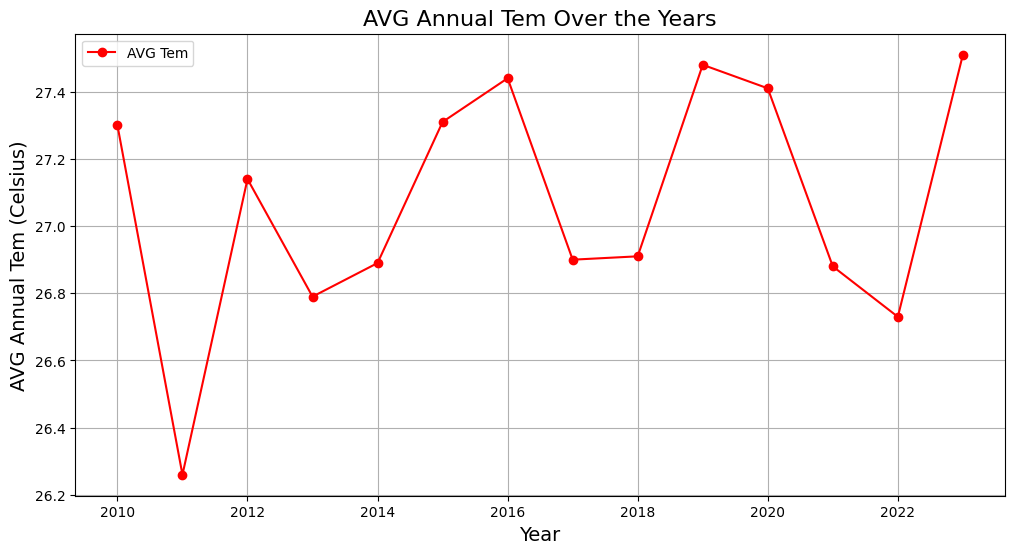

In [ ]:
import matplotlib.pyplot as plt

# คำนวณค่าเฉลี่ยการปล่อย CO2 ต่อปี
result_df = filtered_temmie.groupby('Year')['Annual Mean'].mean().reset_index()

# สร้างกราฟ
plt.figure(figsize=(12, 6))
plt.plot(result_df['Year'], result_df['Annual Mean'], marker='o', color='red', label='AVG Tem')

# ตั้งชื่อกราฟและแกน
plt.title('AVG Annual Tem Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('AVG Annual Tem (Celsius)', fontsize=14)

# เพิ่มตารางกริด
plt.grid(True)

# แสดงคำอธิบาย
plt.legend()

# แสดงกราฟ
plt.show()

#Train Test

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 10, number of used features: 0
[LightGBM] [Info] Start training from score 26.988802
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 10, number of used features: 0
[LightGBM] [Info] Start training from score 27.402477
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

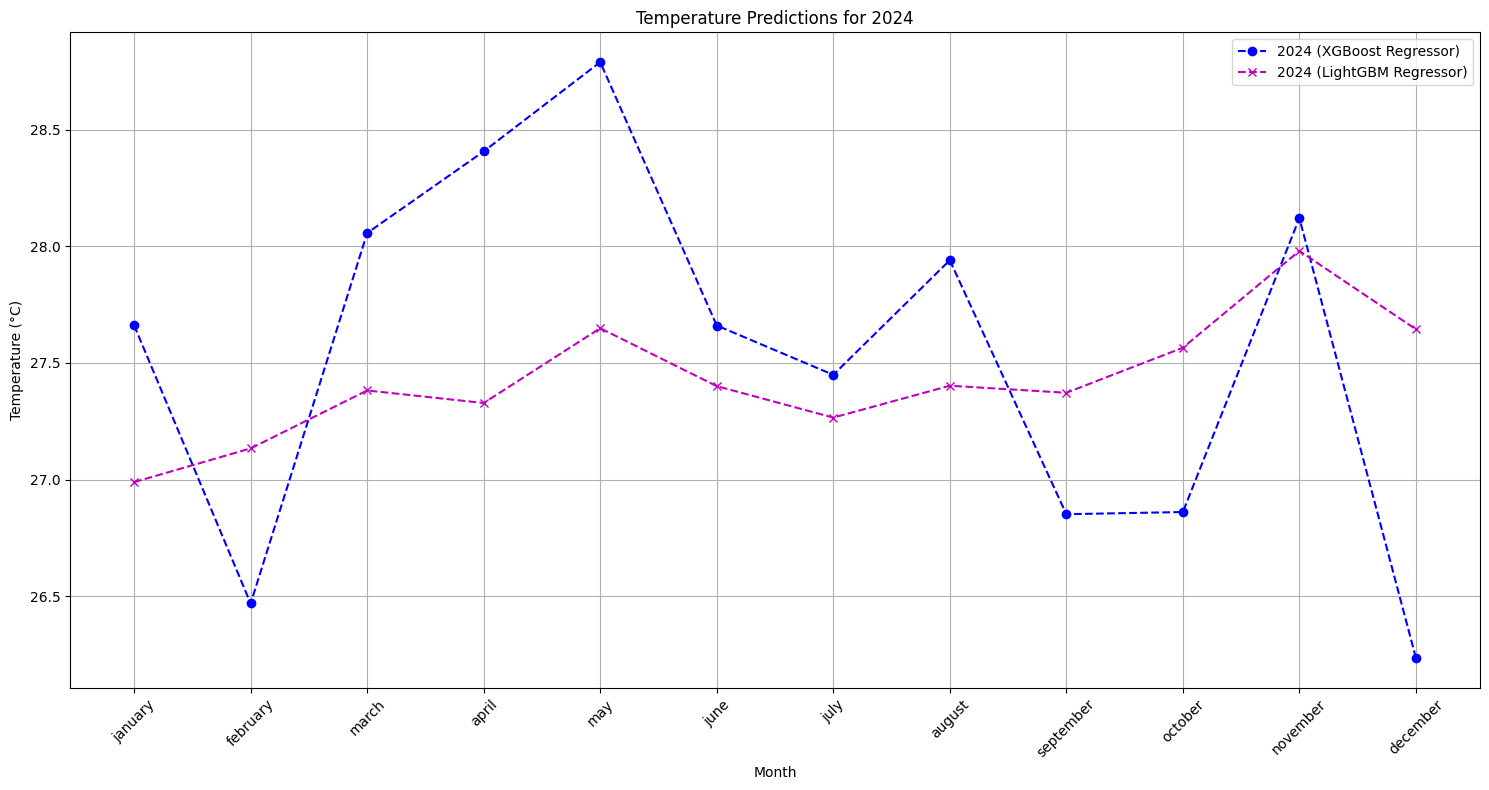

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

def prepare_time_series_data(df):
    years = df['Year'].unique()
    months = ['january', 'february', 'march', 'april', 'may', 'june',
              'july', 'august', 'september', 'october', 'november', 'december']

    X = []
    y = []

    for year in years[:-1]:
        year_data = df[df['Year'] == year]
        next_year_data = df[df['Year'] == (year + 1)]

        if not year_data.empty and not next_year_data.empty:
            X.append(year_data[months].values[0])
            y.append(next_year_data[months].values[0])

    return np.array(X), np.array(y)

# Assuming merged_df is already defined and contains the data
# Prepare the data
X, y = prepare_time_series_data(merged_df)
months = ['january', 'february', 'march', 'april', 'may', 'june',
          'july', 'august', 'september', 'october', 'november', 'december']

# Initialize models for each month
xgb_models = {}
lgbm_models = {}
predictions_2024 = {'XGB': {}, 'LGBM': {}}

# Train models and make predictions for each month
for i, month in enumerate(months):
    # Split data for this month
    X_train, X_test, y_train, y_test = train_test_split(X, y[:, i], test_size=0.2, random_state=42)

    # Train XGBoost Regressor model
    xgb = XGBRegressor(random_state=42)
    xgb.fit(X_train, y_train)
    xgb_models[month] = xgb

    # Train LightGBM Regressor model
    lgbm = LGBMRegressor(random_state=42)
    lgbm.fit(X_train, y_train)
    lgbm_models[month] = lgbm

    # Get last year's data for prediction
    last_year_data = merged_df[merged_df['Year'] == merged_df['Year'].max()][months].values[0]

    # Make predictions for 2024
    predictions_2024['XGB'][month] = xgb.predict([last_year_data])[0]
    predictions_2024['LGBM'][month] = lgbm.predict([last_year_data])[0]

# Create visualization
plt.figure(figsize=(15, 8))

# Plot predicted data for 2024
xgb_predicted = pd.Series(predictions_2024['XGB'].values(), index=months)
lgbm_predicted = pd.Series(predictions_2024['LGBM'].values(), index=months)

plt.plot(xgb_predicted.index, xgb_predicted.values, 'b--', label='2024 (XGBoost Regressor)', marker='o')
plt.plot(lgbm_predicted.index, lgbm_predicted.values, 'm--', label='2024 (LightGBM Regressor)', marker='x')

plt.title('Temperature Predictions for 2024')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Print predictions and evaluation metrics
print("\nPredicted Monthly Temperatures for 2024:")
print("-" * 55)
print(f"{'Month':<12} {'XGB Prediction':>15} {'LGBM Prediction':>15}")
print("-" * 55)

for month in months:
    xgb_pred = predictions_2024['XGB'][month]
    lgbm_pred = predictions_2024['LGBM'][month]
    print(f"{month.capitalize():<12} {xgb_pred:>15.2f}°C {lgbm_pred:>15.2f}°C")

# Calculate and print average predictions
xgb_avg = np.mean(list(predictions_2024['XGB'].values()))
lgbm_avg = np.mean(list(predictions_2024['LGBM'].values()))

print("\nAverage Temperature Predictions for 2024:")
print(f"XGBoost Regressor Model: {xgb_avg:.2f}°C")
print(f"LightGBM Regressor Model: {lgbm_avg:.2f}°C")

# Calculate model performance metrics
print("\nModel Performance Metrics:")
print("-" * 50)
for model_name, models in [("XGBoost Regressor", xgb_models), ("LightGBM Regressor", lgbm_models)]:
    mse_scores = []
    r2_scores = []

    for month in months:
        X_train, X_test, y_train, y_test = train_test_split(X, y[:, months.index(month)], test_size=0.2, random_state=42)
        y_pred = models[month].predict(X_test)

        mse_scores.append(mean_squared_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))

    print(f"\n{model_name}:")
    print(f"Average MSE: {np.mean(mse_scores):.4f}")
    print(f"Average R²: {np.mean(r2_scores):.4f}")

plt.tight_layout()
plt.show()